## Build a predictive linear regression model for given dataset, given humidity predict apparent temperature


### Data Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# reading dataset file
data = pd.read_csv('weatherHistory.csv')
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [2]:
data.isna().sum()              # checking column-wise any null value

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

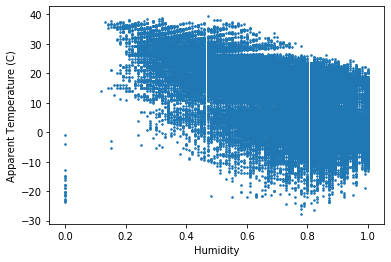

In [3]:
# plotting humidity vs apparent temperature
plt.scatter(data['Humidity'], data['Apparent Temperature (C)'], marker='.',s=10)  
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.show()
# we can see that there is wide strip/band of data points that shows us linear correlation

### Splitting dataset into train set & test set

In [4]:
data = data.loc[:,['Humidity','Apparent Temperature (C)']]
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set
data_copy = data.copy()         # copying data into another data frame
train_set = data_copy.sample(frac=0.7, random_state=0)   # selecting random 0.7 fraction of dataset as train set
train_set                            # chossing different random state will give different random rows

,Humidity,Apparent Temperature (C)
6119,0.93,14.422222
51443,0.72,12.155556
18754,0.61,23.961111
34070,0.87,15.000000
26082,0.77,12.800000
...,...,...
29306,0.92,-9.238889
92605,0.76,20.316667
55570,0.89,0.316667
10071,0.60,22.033333


In [5]:
test_set = data_copy.drop(train_set.index)            # selecting remaining i.e. 30% as test set
test_set 

,Humidity,Apparent Temperature (C)
2,0.89,9.377778
7,0.89,6.527778
10,0.67,16.016667
13,0.51,17.333333
16,0.60,15.388889
...,...,...
96431,0.87,16.144444
96432,0.87,15.594444
96441,0.37,28.216667
96442,0.33,29.972222


In [6]:
# coverting required columns Humidity & Apparent Temperatue (C) to numpy array
humidity = np.array(train_set['Humidity'])
apparent_temp = np.array(train_set['Apparent Temperature (C)'])
humidity, apparent_temp

(array([0.93, 0.72, 0.61, ..., 0.89, 0.6 , 0.85]),
 array([14.42222222, 12.15555556, 23.96111111, ...,  0.31666667,
        22.03333333, -1.31666667]))

### Building model

In [7]:
total = len(humidity)
theta0 = 40             # choosing random parameters theta0 & theta1
theta1 = 0             # but observed approx values for slope & y-intercept can reduce iterations
alpha = 0.01           # learning rate for gradient descent
iterations = 10000     # total steps to be taken in gradient descent  

predict = lambda humidity : theta0*np.ones(len(humidity)) + theta1*humidity 

# defining derivative of cost functions (avg difference betn value of y from hypothesis & actual y) for parameters theta0 & theta1 
def der_cost0():
    return (predict(humidity) - apparent_temp).sum()/total
    
def der_cost1():
    return (predict(humidity) - apparent_temp).dot(humidity)/total

# applying gradient descent algorithm
for _ in range(iterations):
    temp0 = theta0 - alpha*der_cost0()             # correcting parameters by decreasing  
    temp1 = theta1 - alpha*der_cost1()             # cost function goes on decreasing as we tend towards minimum 
    theta0 = temp0                           #  simultaneously updating parameters
    theta1 = temp1

In [8]:
print(f'theta0: {theta0} theta1: {theta1}')
print(f'Hypothesis function: y = {theta0} + {theta1}*x')

theta0: 33.925497137859956 theta1: -31.424682801948265
Hypothesis function: y = 33.925497137859956 + -31.424682801948265*x


### Plotting predicted line against given data points

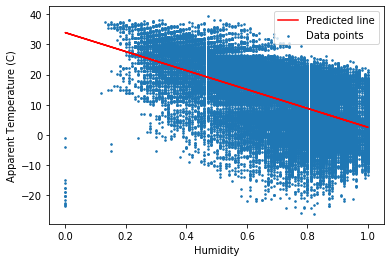

In [9]:
plt.scatter(humidity,apparent_temp, marker ='.',s=10, label='Data points') 
plt.plot(humidity, predict(humidity), c='r', label='Predicted line')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
plt.show()

### Calculating mean error

In [10]:
# Finding Root mean squared error (RMSE)
mse = ((predict(train_set['Humidity'])- train_set['Humidity'])**2).sum()        # mean squared error
rmse = np.sqrt(mse/total)             # root mean squared error
rmse

11.925427089386373

###  Evaluating model accuracy against test set

In [11]:
# Calculating accuracy of built model against test set
# Using R^2 score(Coeff of Determination) 
ssr = ((predict(test_set['Humidity']) - test_set['Apparent Temperature (C)'])**2).sum()        # sum of square of residuals/errors
sst = ((test_set['Apparent Temperature (C)']- test_set['Apparent Temperature (C)'].mean())**2).sum()           # sum of squares of actual deviations
R_sqr_score = (1 - ssr/sst)   
R_sqr_score

0.3610077631715697

In [ ]:
# Calculating accuracy using avg error
total_error = abs(predict(test_set['Humidity'])- test_set['Apparent Temperature (C)'])/test_set['Apparent Temperature (C)']
(1- total_error.sum()/total)*100        # percentage of accuracy